# Employee Exit Surveys 

The project is focused around working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The major questions posed by stakeholders are:
1) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

2) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The agenda is to first perform some data munging to clean the combined datasets, then focus on data wrangling to answer the questions. 

In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The datasets are two exit surveys found below:
- [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
- [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

## Loading the Data

In [312]:
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [313]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [314]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


Given the plethora of data which should've been elements rather than indexes, some turnication is necessary as without it analysis will prove to be very cumbersome. We will drop columns[28:49] from the DETE survey and columns [17:66] from the TAFE survey. 

## Data Cleaning 

In [315]:
dete_survey_updated = dete_survey.drop(dete_survey.iloc[:,28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.iloc[:,17:66], axis = 1)

To remove the possiblity of errors because of column name typos, all column names will be lowercased with the spaces in between text changed to underscores. 

In [316]:
dete_survey_updated.columns = dete_survey_updated.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("/", "_")

In [317]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Renaming some columns to match those in the DETE dataset. 

In [318]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

In [319]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In [320]:
dete_survey_updated['separationtype'].value_counts

<bound method IndexOpsMixin.value_counts of 0                     Ill Health Retirement
1          Voluntary Early Retirement (VER)
2          Voluntary Early Retirement (VER)
3                 Resignation-Other reasons
4                            Age Retirement
                       ...                 
817                          Age Retirement
818                          Age Retirement
819    Resignation-Move overseas/interstate
820                   Ill Health Retirement
821    Resignation-Move overseas/interstate
Name: separationtype, Length: 822, dtype: object>

In [321]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

Given the question posed by the stakeholders focuses on people that resigned, we will isolate data for only those individuals with `separationtype` as some form of resignation. This will be done in a copied dataframe to assure no original data is lost.

In [322]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation', regex=False)]

In [323]:
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [324]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains('Resignation', na=False, regex=False)]

In [325]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

We now check for inconsistencies in the given data-ranges to assure that the following are true:
- No `dete_start_date` before 1940.
- No `cease_date` that is lower than `dete_start_date`.
- No `cease_date` greater than 2020.
- No NaN `dete_resignations` or `cease_date`.


In [326]:
dete_resignations['cease_date'].value_counts(dropna=False).sum()

311

In [327]:
dete_resignations.loc[:,'cease_date'] = dete_resignations.loc[:,'cease_date'].str.extract("(20\d\d)", expand=False)

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [328]:
dete_resignations['cease_date'].value_counts(dropna=False).sum()

311

In [329]:
dete_resignations.loc[:,'cease_date'] = dete_resignations.loc[:,'cease_date'].astype('float64')

In [330]:
dete_resignations['dete_start_date'].value_counts(ascending=True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [331]:
tafe_resignations['cease_date'].value_counts(ascending=True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

All date ranges look fine. 

## Analysis 
We now calculate the number of years of service for employees in the DETE, the TAFE dataframe already has a column titled `institute_service` which gives the desired value.  

In [332]:
dete_resignations.loc[:,'institute_service'] = -dete_resignations.loc[:,'dete_start_date']+dete_resignations.loc[:,'cease_date']

/dataquest/system/env/python3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [333]:
dete_resignations.loc[:,'institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

In [334]:
dete_resignations.columns[[13, 14, 15, 16, 17, 18, 19, 20, 25, 26]]

Index(['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'work_life_balance', 'workload'],
      dtype='object')

We will try this again by using `np.concatenate` just for the sake of practice. We want to see the values inside these to make sure there isn't anything unexpected. 

In [335]:
interested_columns = np.concatenate((dete_resignations.columns[13:20],dete_resignations.columns[25:27]), axis=None)

In [336]:
for col in interested_columns:
    print(dete_resignations[col].value_counts(dropna=False))

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64


We will now create a new column that marks dissatisfied employees based on their answers to these questions. 

In [337]:
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

assert update_vals('Check') == True

In [338]:
tafe_resignations.loc[:,'Contributing Factors. Dissatisfaction'] = tafe_resignations.loc[:,'Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations.loc[:,'Contributing Factors. Job Dissatisfaction'] = tafe_resignations.loc[:,'Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [339]:
tafe_resignations.loc[:,'dissatisfied']=tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)

In [340]:
tafe_resignations.loc[:,'dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [341]:
dete_resignations.loc[:,'dissatisfied']=dete_resignations[interested_columns].any(axis=1, skipna=False)

In [342]:
dete_resignations.loc[:,'dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [343]:
tafe_resignations.loc[:,'institute']="TAFE"
dete_resignations.loc[:,'institute']="DETE"

In [348]:
combined = pd.concat([dete_resignations, tafe_resignations], ignore_index=True)
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,...,-,-,False,False,-,-,-,-,-,5-6
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,...,-,-,False,False,-,-,-,-,-,1-2
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,-,False,False,-,-,-,-,-,NaN
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,...,-,-,False,False,-,-,-,Other,-,1-2


We combined both datasets after adding a new column to determine which is which, we will now look at more existing NaN values and drop columns with less than 500 non-null values. 

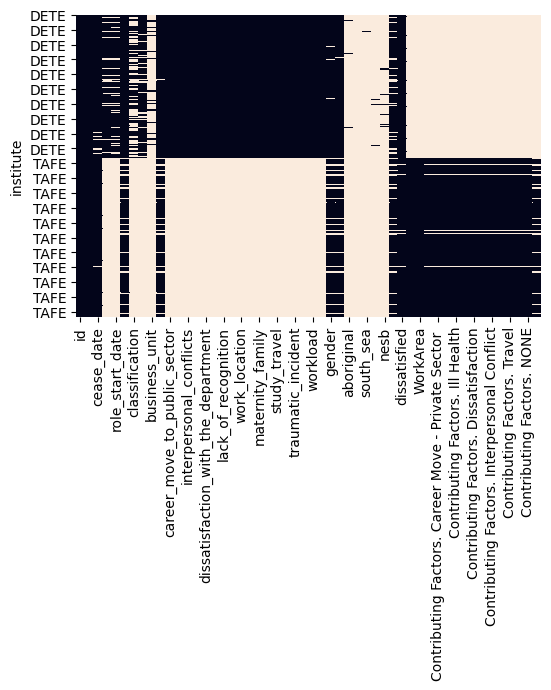

In [362]:
combined_test = combined.set_index('institute')
sns.heatmap(combined_test.isnull(), cbar=False)
plt.show()

In [368]:
combined.dropna(thresh=500, axis=1, inplace=True)

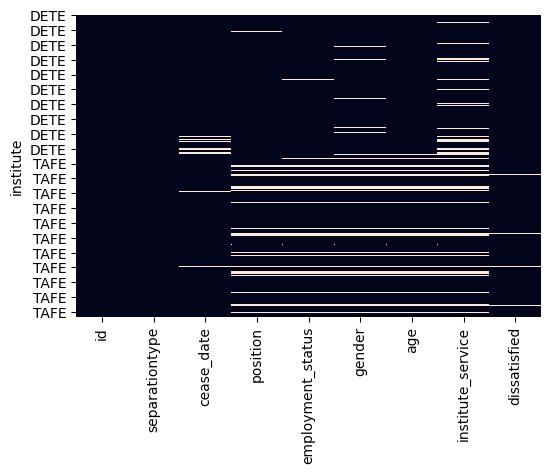

In [369]:
combined_test = combined.set_index('institute')
sns.heatmap(combined_test.isnull(), cbar=False)
plt.show()

In [370]:
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1
